# NLP_spam_email_classifier

In this project three models and a pre-trained spacy model ("en_core_web_lg") are used to classify emails as spam or not spam.

## Models used:

- KNeighborsClassifier
- RandomForestClassifier
- MultinomialNB

## Libraries used:

- spacy
- sklearn
- numpy
- seaborn

## Results

The best predictions were made with the RandomForestClassifier and a precision of ~94%



In [95]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

Data from https://www.kaggle.com/datasets/datatattle/email-classification-nlp?select=SMS_test.csv

In [96]:
df = pd.read_csv("Data.csv", encoding="ISO-8859-1", index_col=0)

In [97]:
df["Label"].value_counts()

Non-Spam    884
Spam        198
Name: Label, dtype: int64

In [98]:
df["Label_num"] = df["Label"].map({
    "Non-Spam": 0,
    "Spam": 1
})


In [99]:
nlp = spacy.load("en_core_web_lg")

In [100]:
def preprocessing(text):
    doc = nlp(text)
    
    usefulTokens = []
    
    for token in doc:
        if not (token.is_punct or token.is_stop):
            usefulTokens.append(token.lemma_)
    t = " ".join(usefulTokens)
    return nlp(t).vector

df["vector"] = df["Message_body"].apply(preprocessing)

    

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df["vector"], df["Label_num"], stratify=df["Label_num"], test_size=0.2, random_state=123)

In [102]:
print("Train:")
print(y_train.value_counts())
print("Test:")
print(y_test.value_counts())

Train:
0    707
1    158
Name: Label_num, dtype: int64
Test:
0    177
1     40
Name: Label_num, dtype: int64


In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       177
           1       0.69      0.93      0.79        40

    accuracy                           0.91       217
   macro avg       0.83      0.91      0.86       217
weighted avg       0.93      0.91      0.91       217



<AxesSubplot:>

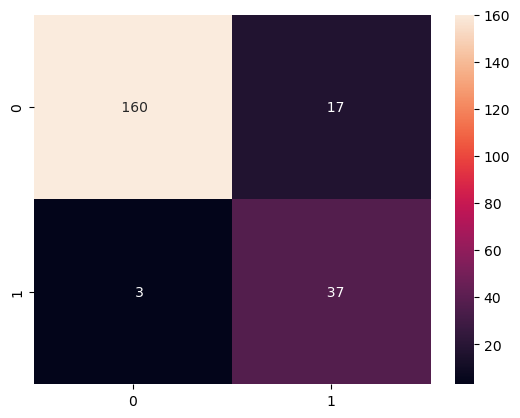

In [104]:
model = KNeighborsClassifier()

model.fit(np.stack(X_train),y_train)
y_pred = model.predict(np.stack(X_test))


cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True,fmt='4')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       177
           1       0.96      0.68      0.79        40

    accuracy                           0.94       217
   macro avg       0.95      0.83      0.88       217
weighted avg       0.94      0.94      0.93       217



<AxesSubplot:>

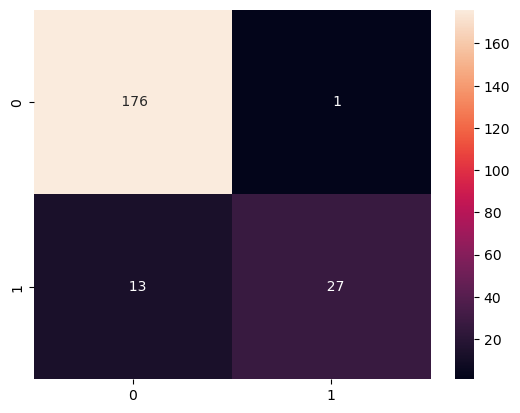

In [105]:
model = RandomForestClassifier()

model.fit(np.stack(X_train),y_train)
y_pred = model.predict(np.stack(X_test))


cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True,fmt='4')

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       177
           1       0.62      0.12      0.21        40

    accuracy                           0.82       217
   macro avg       0.73      0.55      0.55       217
weighted avg       0.79      0.82      0.77       217



<AxesSubplot:>

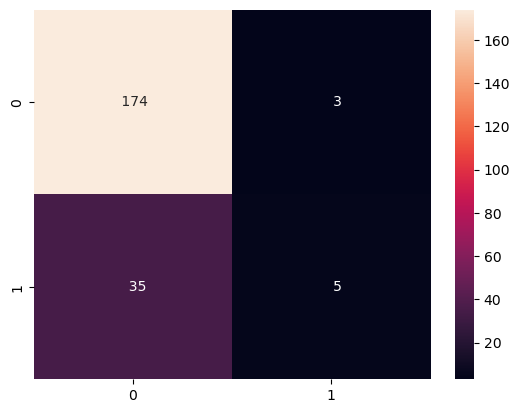

In [106]:

model = MultinomialNB()
scaler = MinMaxScaler()

model.fit(scaler.fit_transform(np.stack(X_train)),y_train)
y_pred = model.predict(scaler.transform(np.stack(X_test)))


cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True,fmt='4')